# 02. Clasificacion de redes neuronales con PyToch

La clasificacion es un problema de predecir si algo es una cosa u otra (puede haber mas de una sola opcion)

Fuente: https://www.learnpytorch.io/pytorch_2_intro/

## 1. Crear los datos para la clasificacion y prepararlos.

In [126]:
import sklearn
from sklearn.datasets import make_circles

Ver: https://scikit-learn.org/stable/datasets/toy_dataset.html

In [127]:
# Make 1000 samples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)       # Equivalente a setear la seed

In [128]:
print(f"Primeros 5 valores de X: \n{x[:5]}")
print(f"Primeros 5 valores de y: \n{y[:5]}")

Primeros 5 valores de X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Primeros 5 valores de y: 
[1 1 1 1 0]


In [129]:
# Crear un dataframe con los datos
import pandas as pd

circulos = pd.DataFrame({"X0": x[:, 0],
                         "X1": x[:, 1],
                         "label": y})

circulos.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


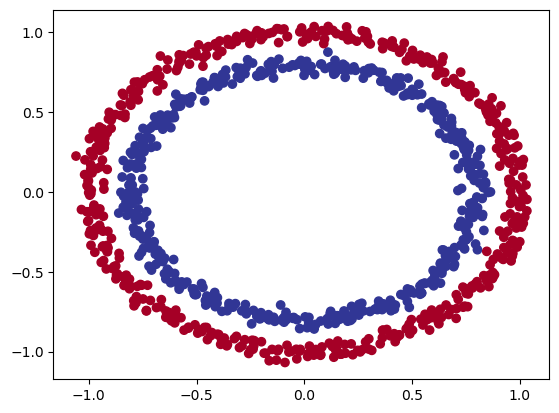

In [130]:
# Visualizar los datos

import matplotlib.pyplot as plt
plt.scatter(x[:, 0],
            x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Revisar las shapes de los datos tanto de los de input como de los de output

In [131]:
x.shape, y.shape

((1000, 2), (1000,))

In [132]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [133]:
# Ver el primer ejemplo de propiedaes y etiquetas
x_sample = x[0]
y_sample = y[0]

print(f"Valores para una muestra de x: {x_sample} y lo mismo para y: {y_sample}")  # Aqui podemos ver que con dos propiedades de x intentaremos predecir una muestra de y
print(f"Shape de x: {x_sample.shape} y de y: {y_sample.shape}")

Valores para una muestra de x: [0.75424625 0.23148074] y lo mismo para y: 1
Shape de x: (2,) y de y: ()


### 1.2 Convertir los datos a tensores de PyTorch y crear division de datos de entrenamiento y test

In [134]:
# Convertir los datos a tensores de PyTorch
import torch
torch.__version__

'2.0.1'

In [135]:
type(x)

numpy.ndarray

In [136]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [137]:
type(x), x.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [138]:
# Crear division de datos de entrenamiento y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 20% de los datos para test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [139]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Crear el modelo

Crearemos un modelo para clasificar nuestros circulos azules y rojos.

Para esto queremos:
1. Crear un dispositivo que tenga en cuenta el dispositivo donde se ejecuta
2. Crear un modelo (una clase) que herede de nn.Module
3. Definir la funcion de perdida y el optimizador
4. Crear los ciclos de entrenamiento y testeo

In [140]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Crearemos el modelo:
1. Ha de heredar de `nn.Module`
2. Crear 2 capas lineales con `nn.Linear`
3. Definir un metodo `forward` que pase los datos por las capas lineales
4. Instanciar el modelo y enviarlo al dispositivo

In [141]:
from sklearn import datasets

class CirculoModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features = 2, out_features = 8) # 2 propiedades de entrada y 5 neuronas en la capa oculta
        self.layer2 = nn.Linear(in_features = 8, out_features = 1)  # 5 neuronas en la capa oculta y 1 neurona de salida

    def forward(self, x):
        return self.layer2(self.layer1(x)) # Pasamos los datos por la capa 1 y luego por la capa 2

model = CirculoModel().to(device)
model

CirculoModel(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

In [142]:
# se puede replicar lo de arriba con nn.Secuetial
model = nn.Sequential( # nn.Sequential es una clase que permite crear modelos de forma mas sencilla
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)
model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [143]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4310, -0.7000, -0.2732, -0.5424,  0.5802,  0.2037,  0.2929,  0.2236],
                     device='cuda:0')),
             ('1.weight',
              tensor([[-0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218,  0.1083]],
                     device='cuda:0')),
             ('1.bias', tensor([-0.0737], device='cuda:0'))])

In [144]:
# Hacrer predicciones con el modelo
with torch.inference_mode():
    predicciones_sin_entrenar = model(x_test.to(device))
print(f"Longitud de las predicciones: {len(predicciones_sin_entrenar)}, Forma: {predicciones_sin_entrenar.shape}")
print(f"Longitud de los datos de entrenamiento: {len(x_test)}, Forma: {x_test.shape}")
print(f"Primeras 10 predicciones: {predicciones_sin_entrenar[:10]}")
print(f"Primeras 10 etiquetas: {y_test[:10]}")

Longitud de las predicciones: 200, Forma: torch.Size([200, 1])
Longitud de los datos de entrenamiento: 200, Forma: torch.Size([200, 2])
Primeras 10 predicciones: tensor([[-0.4038],
        [-0.3557],
        [-0.4277],
        [-0.3974],
        [-0.2659],
        [-0.2378],
        [-0.2308],
        [-0.2028],
        [-0.4345],
        [-0.3507]], device='cuda:0')
Primeras 10 etiquetas: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Definir la funcion de perdida y el optimizador

Que funcion de perdida usaremos? https://pytorch.org/docs/stable/nn.html#loss-functions
Este problema es especifico.
Por ejemplo, para regresion usamos MAE o MSE

Para clasificacion, por otro lado, usamos CrossEntropyLoss o CategoircalCrossEntropyLoss.
(https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

Y para el optimizador, usaremos SGD (Stochastic Gradient Descent) o Adam (https://pytorch.org/docs/stable/optim.html), sin envargo pytorch tiene muchos mas optimizadores integrados.

* Para la funcion de perdida usaremos `torch.nn.BCEWithLogitsLoss` (https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss)

In [145]:
# Definir la funcion de perdida
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = tiene la funcion de activacion Sigmoid integrada

optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01) # SGD = Stochastic Gradient Descent

In [146]:
# Calcular la certeza, de 100 ejemplos, cuantos acierta nuestro modelo
def certeza_fn(y_true, y_pred):
    correct = torch.eq(y_pred, y_true).sum().item()
    acc = (correct / len(y_true)) * 100
    return acc

## 3. Entrenar el modelo

Para entrenar el modelo, necesitamos un ciclo de entrenamiento:
1. Forward pass: pasar los datos por el modelo
2. Calcular la perdida
3. Optimazer cero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Pasar de logits a probabilidades a etiquetas

La salida de nuestro modelo son **logits** puros (https://en.wikipedia.org/wiki/Logit).
Podemos convertir estos logits en **predicciones de probabilidades** pasandolos por una funcion de activacion (e.g sigmoid para clasificacion binaria y softmax para clasificacion multiclase).

Entonces podremos convertir las probabilidades en etiquetas (0 o 1) mediante reondeo (clasificacion binaria) o cogiendo el `argmax` (clasificacion multiclase).

In [147]:
# Mirar los 5 primeros outputs del fordward pass en nuestros datos de test
with torch.inference_mode():
    y_logits = model(x_test.to(device))[:5]
y_logits

tensor([[-0.4038],
        [-0.3557],
        [-0.4277],
        [-0.3974],
        [-0.2659]], device='cuda:0')

In [148]:
# Convertir los logits en probabilidades con la funcion de activacion Sigmoid
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4004],
        [0.4120],
        [0.3947],
        [0.4019],
        [0.4339]], device='cuda:0')

Para nuestros valores de probabilidad de prediccion, necesitamos utilizar un redondeo en ellos:
* `y_pred_probs` > 0.5 -> 1
* `y_pred_probs` < 0.5 -> 0

In [149]:
# Convertir las probabilidades en etiquetas
y_pred_labels = torch.round(y_pred_probs)
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [150]:
# En una sola linea
y_pred_labels = torch.round(torch.sigmoid(model(x_test.to(device))[:5]))
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

### 3.2 Crear el ciclo de entrenamiento y testeo

In [151]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Establecer el numero de epochs
epochs = 1000

# Poner los datos en el dispositivo
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Construir el ciclo de entrenamiento y evaluacion
for epoch in range(epochs):
    ### Entrenamiento ###
    model.train() # Poner el modelo en modo entrenamiento

    # Forward pass
    y_logits = model(x_train).squeeze() # squeeze() elimina las dimensiones de tamaño 1
    y_pred = torch.round(torch.sigmoid(y_logits)) # Convertir los logits en etiquetas pasando por porbabilidades

    # Calcular la perdida/certeza
    loss = loss_fn(y_logits, y_train) # Calcular la perdida, se necestian los logits y las etiquetas de entrenamiento
    acc = certeza_fn(y_true = y_train, y_pred = y_pred)

    # Optimizer zero grad
    optimizer.zero_grad() # Reiniciar los gradientes

    # loss backward
    loss.backward() # Calcular los gradientes

    # optimizer step
    optimizer.step() # Actualizar los parametros

    ### Testeo ###

    model.eval() # Poner el modelo en modo evaluacion
    with torch.inference_mode():
        # Forward pass
        test_logits = model(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calcular la perdida/certeza
        test_loss = loss_fn(test_logits, y_test)
        test_acc = certeza_fn(y_true = y_test, y_pred = test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Perdida: {loss:.5f} | Certeza: {acc:.2f}% | Test perdida: {test_loss:.5f} | Test certeza: {test_acc:.2f}%")


Epoch: 0 | Perdida: 0.70808 | Certeza: 50.00% | Test perdida: 0.70907 | Test certeza: 50.00%
Epoch: 10 | Perdida: 0.70613 | Certeza: 50.00% | Test perdida: 0.70715 | Test certeza: 50.00%
Epoch: 20 | Perdida: 0.70443 | Certeza: 50.00% | Test perdida: 0.70549 | Test certeza: 50.00%
Epoch: 30 | Perdida: 0.70295 | Certeza: 50.00% | Test perdida: 0.70405 | Test certeza: 50.00%
Epoch: 40 | Perdida: 0.70167 | Certeza: 50.00% | Test perdida: 0.70279 | Test certeza: 50.00%
Epoch: 50 | Perdida: 0.70056 | Certeza: 50.00% | Test perdida: 0.70171 | Test certeza: 50.00%
Epoch: 60 | Perdida: 0.69959 | Certeza: 50.00% | Test perdida: 0.70076 | Test certeza: 50.00%
Epoch: 70 | Perdida: 0.69875 | Certeza: 50.00% | Test perdida: 0.69994 | Test certeza: 50.00%
Epoch: 80 | Perdida: 0.69801 | Certeza: 50.00% | Test perdida: 0.69923 | Test certeza: 50.00%
Epoch: 90 | Perdida: 0.69738 | Certeza: 50.00% | Test perdida: 0.69861 | Test certeza: 50.00%
Epoch: 100 | Perdida: 0.69682 | Certeza: 50.00% | Test perdid

## 4. Haz predicciones con el modelo entrenado y evalua el modelo

Parece que el modelo no esta aprendiendo nada
Asi que haremos mas predicciones y hacerlas visuales

Para ello, vamos a importar una funcion llamada `plot_decision_boundary` que nos ayudara a visualizar las predicciones de nuestro modelo.

In [152]:
import requests
from pathlib import Path

# Descargar funciones de apoyo del repositorio de github
if Path("helper_functions.py").is_file():
    print("Este arcivo ya existe")
else:
    print("Descargando archivo...")
    r = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

    with open("helper_functions.py", "wb") as f:
        f.write(r.content)

# Importar las funciones de apoyo
from helper_functions import plot_decision_boundary, plot_predictions

Este arcivo ya existe


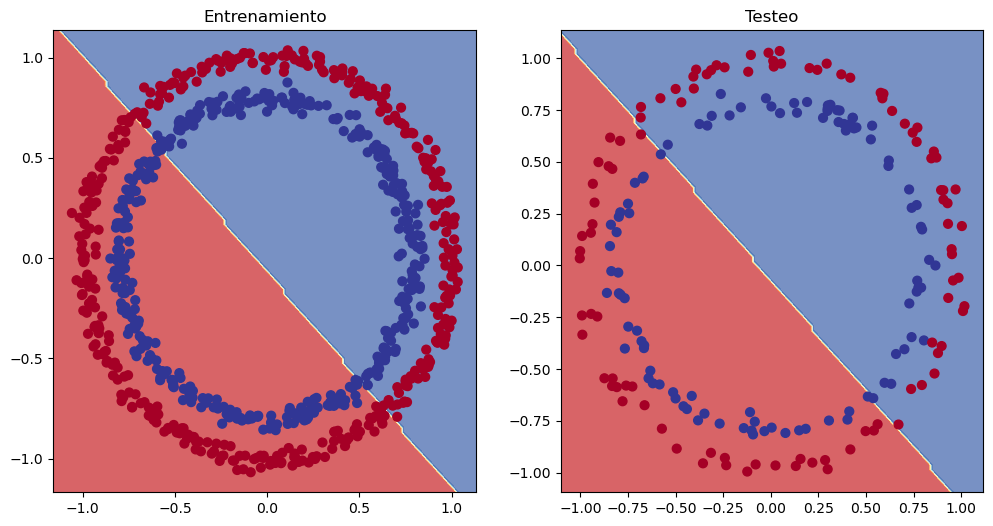

In [153]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Testeo")
plot_decision_boundary(model, x_test, y_test)

## 5. Mejorar el modelo

* Aumentar el numero de capas
* Aumentar el numero de unidades ocultas (ahora hay 8)
* Aumentar el numero de epochs
* Cambiar la funcion de activacion de la capa de salida (ahora es una sigmoid)
* Cambiar el Lr del optimizador

Estas opciones son desde la perspectiva del modelo, ya que se centran en el modelo en si mismo, mas no en los datos.

In [154]:
class CirculoModel_V1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer3 = nn.Linear(in_features = 10, out_features = 1)

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

model_v1 = CirculoModel_V1().to(device)
model_v1

CirculoModel_V1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [155]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_v1.parameters(), lr = 0.1)

In [156]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Establecer el numero de epochs
epochs = 1000

# Poner los datos en el dispositivo
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Construir el ciclo de entrenamiento y evaluacion
for epoch in range(epochs):
    ### Entrenamiento ###
    model_v1.train() # Poner el modelo en modo entrenamiento

    # Forward pass
    y_logits = model_v1(x_train).squeeze() # squeeze() elimina las dimensiones de tamaño 1
    y_pred = torch.round(torch.sigmoid(y_logits)) # Convertir los logits en etiquetas pasando por porbabilidades

    # Calcular la perdida/certeza
    loss = loss_fn(y_logits, y_train) # Calcular la perdida, se necestian los logits y las etiquetas de entrenamiento
    acc = certeza_fn(y_true = y_train, y_pred = y_pred)

    # Optimizer zero grad
    optimizer.zero_grad() # Reiniciar los gradientes

    # loss backward
    loss.backward() # Calcular los gradientes

    # optimizer step
    optimizer.step() # Actualizar los parametros

    ### Testeo ###

    model_v1.eval() # Poner el modelo en modo evaluacion
    with torch.inference_mode():
        # Forward pass
        test_logits = model_v1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calcular la perdida/certeza
        test_loss = loss_fn(test_logits, y_test)
        test_acc = certeza_fn(y_true = y_test, y_pred = test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Perdida: {loss:.5f} | Certeza: {acc:.2f}% | Test perdida: {test_loss:.5f} | Test certeza: {test_acc:.2f}%")

Epoch: 0 | Perdida: 0.69396 | Certeza: 50.88% | Test perdida: 0.69261 | Test certeza: 51.00%
Epoch: 10 | Perdida: 0.69369 | Certeza: 50.25% | Test perdida: 0.69270 | Test certeza: 50.00%
Epoch: 20 | Perdida: 0.69351 | Certeza: 50.12% | Test perdida: 0.69283 | Test certeza: 49.50%
Epoch: 30 | Perdida: 0.69339 | Certeza: 50.50% | Test perdida: 0.69297 | Test certeza: 48.00%
Epoch: 40 | Perdida: 0.69329 | Certeza: 50.38% | Test perdida: 0.69310 | Test certeza: 49.00%
Epoch: 50 | Perdida: 0.69322 | Certeza: 49.88% | Test perdida: 0.69324 | Test certeza: 50.00%
Epoch: 60 | Perdida: 0.69317 | Certeza: 49.38% | Test perdida: 0.69336 | Test certeza: 51.50%
Epoch: 70 | Perdida: 0.69312 | Certeza: 49.38% | Test perdida: 0.69348 | Test certeza: 50.50%
Epoch: 80 | Perdida: 0.69309 | Certeza: 50.12% | Test perdida: 0.69359 | Test certeza: 50.00%
Epoch: 90 | Perdida: 0.69307 | Certeza: 50.50% | Test perdida: 0.69370 | Test certeza: 48.50%
Epoch: 100 | Perdida: 0.69305 | Certeza: 50.38% | Test perdid

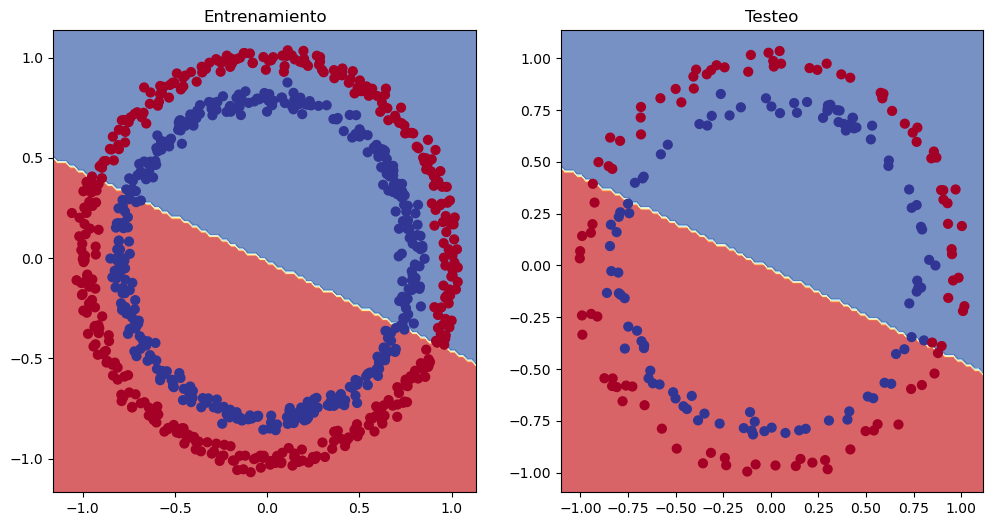

In [157]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(model_v1, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Testeo")
plot_decision_boundary(model_v1, x_test, y_test)